In [1]:
# import statistical tools
from __future__ import print_function
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

In [3]:
# import data visualisation tools
import matplotlib.pyplot as plt
from matplotlib import pylab
import plotly.plotly as py
import plotly.graph_objs as go
import seaborn as sns
%matplotlib inline

In [4]:
# import and view first 10 items of file
url = "/Users/arpanganguli/Documents/Finance/ISLR/Datasets/Auto.csv"
Auto = pd.read_csv(url)
print(Auto.head())
print(list(Auto))
Auto = Auto.drop(Auto.index[[32, 126, 330, 336, 354]])
"""
removing rows containing "?". This is the easy way out. Such missing
values need to be explored first in a real life situation.
"""
print(Auto.info())

    mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0  18.0          8         307.0        130    3504          12.0    70   
1  15.0          8         350.0        165    3693          11.5    70   
2  18.0          8         318.0        150    3436          11.0    70   
3  16.0          8         304.0        150    3433          12.0    70   
4  17.0          8         302.0        140    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  
['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64

                   mpg  cylinders  displacement    weight  acceleration  \
mpg           1.000000  -0.777618     -0.805127 -0.832244      0.423329   
cylinders    -0.777618   1.000000      0.950823  0.897527     -0.504683   
displacement -0.805127   0.950823      1.000000  0.932994     -0.543800   
weight       -0.832244   0.897527      0.932994  1.000000     -0.416839   
acceleration  0.423329  -0.504683     -0.543800 -0.416839      1.000000   
year          0.580541  -0.345647     -0.369855 -0.309120      0.290316   
origin        0.565209  -0.568932     -0.614535 -0.585005      0.212746   

                  year    origin  
mpg           0.580541  0.565209  
cylinders    -0.345647 -0.568932  
displacement -0.369855 -0.614535  
weight       -0.309120 -0.585005  
acceleration  0.290316  0.212746  
year          1.000000  0.181528  
origin        0.181528  1.000000  


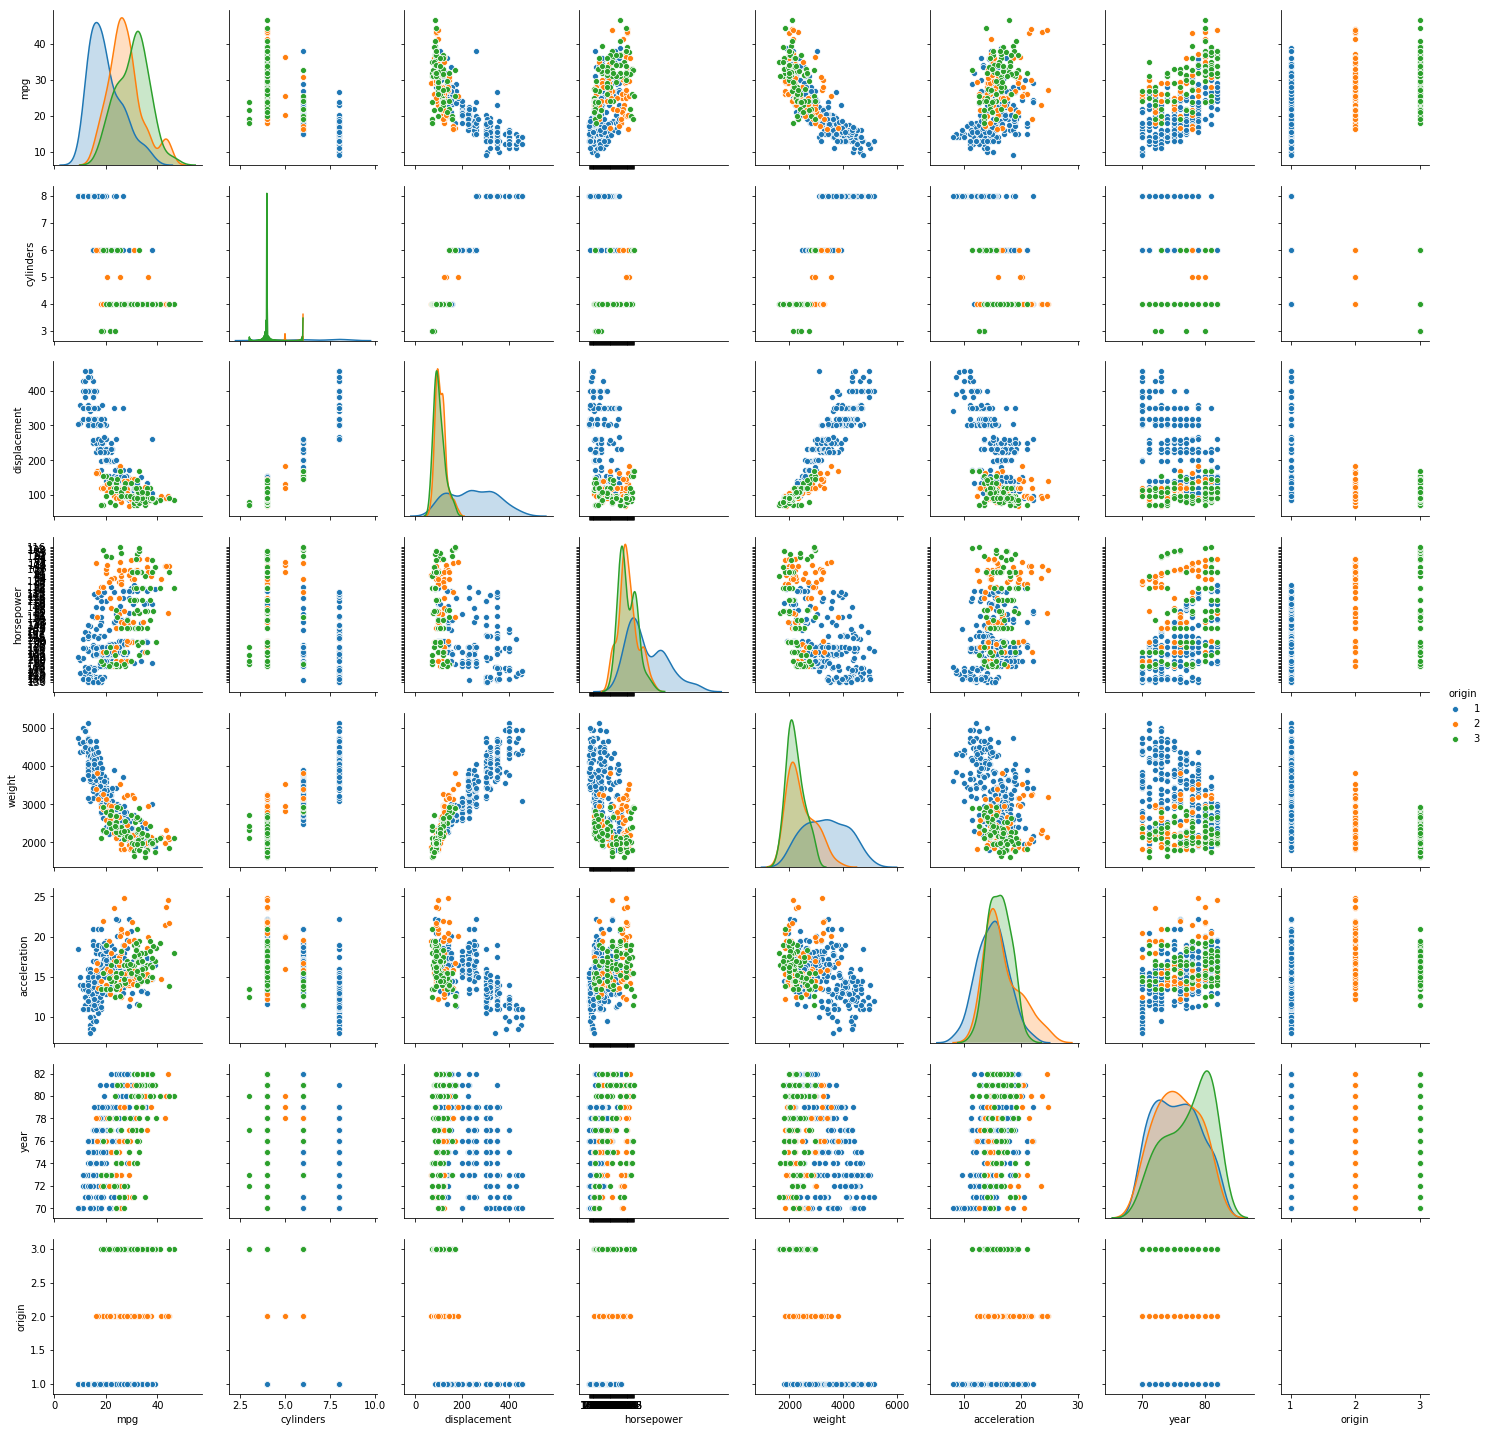

In [8]:
# 9.a. Scatterplot Matrix
sns.pairplot(Auto, hue = "origin")

# 9.b. Correlation Matrix
Correlation_Matrix = Auto.corr()
print(Correlation_Matrix)

In [13]:
# 9.e. & 9.f. Run multivariate regression with interaction terms and transformations

X1 = Auto['horsepower']
X2 = Auto['weight']
X3 = Auto['acceleration']
X4 = Auto['year']
X5 = Auto['origin']
X6 = Auto['displacement']
X7 = Auto['cylinders']
Y = Auto['mpg']

reg = ols("Y~X1+X2+X3+X4+X5+X6+X7+X7*X6+X7*X2+X6*X2", data = Auto).fit()

In [14]:
"""
There is no pure statistical method to assess interaction terms. ISLR 
provides some clever examples to deduce this. But ultimately, it will depend
on chopping and changing between different independent variables depending
on your research goals. This question on Stats Stack Exchange provides an
excellent answer - http://bit.ly/2ApTvQ4
For the sake of brevity, I have included interactions between terms with
higest covariance amongst them.
"""

'\nThere is no pure statistical method to assess interaction terms. ISLR \nprovides some clever examples to deduce this. But ultimately, it will depend\non chopping and changing between different independent variables depending\non your research goals. This question on Stats Stack Exchange provides an\nexcellent answer - http://bit.ly/2ApTvQ4\nFor the sake of brevity, I have included interactions between terms with\nhigest covariance amongst them.\n'

In [15]:
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     28.29
Date:                Sun, 06 Jan 2019   Prob (F-statistic):          3.31e-106
Time:                        17:41:47   Log-Likelihood:                -893.86
No. Observations:                 392   AIC:                             1992.
Df Residuals:                     290   BIC:                             2397.
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.6408      7.511     -1.417      0.1

In [17]:
reg = ols("Y~X1+X2+X3+X4+X5+X6+X7+I(np.log(X2))+I(X4^2)", data = Auto).fit()
"""
I randomly chose two transformations for two variables:
    1.  Log-transformation for X1: OLS result suggests that for a unit
        change in log(X1), the miles per gallon reduces by ~27.2 units
    2. Square of X4: OLS result suggests that for a unit increase in 
        X4^2, the miles per gallon reduces by 0.12 units. However, the
        high p-value of this statistic suggests that the null hypothesis
        cannot be rejected. Therefore, essentially there is no difference
        between this particular value and 0, and therefore this statistic
        can be discarded.        
"""
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     28.77
Date:                Sun, 06 Jan 2019   Prob (F-statistic):          3.86e-107
Time:                        17:42:24   Log-Likelihood:                -893.21
No. Observations:                 392   AIC:                             1988.
Df Residuals:                     291   BIC:                             2390.
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        84.2692     48.470      1.739